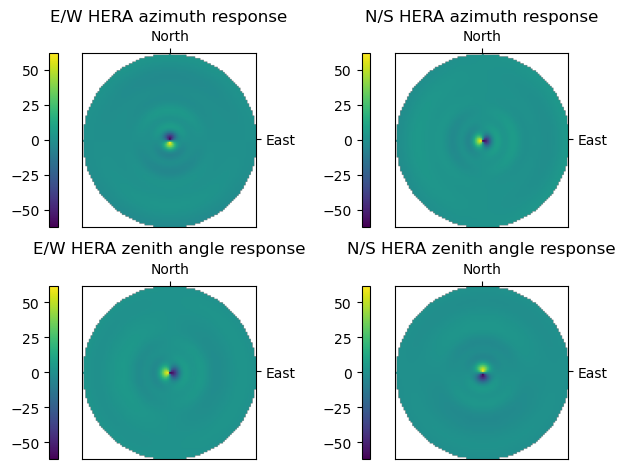

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pyuvdata import UVBeam
from pyuvdata.datasets import fetch_data

fetch_data(["hera_fagnoni_dipole_150", "hera_fagnoni_dipole_123"])
filename = fetch_data("hera_fagnoni_dipole_yaml")
hera_beam = UVBeam.from_file(filename, beam_type="efield")

# set up zenith angle, azimuth and frequency arrays to evaluate with
# make a regular grid in direction cosines for nice plots
n_vals = 100
zmax = np.radians(90)  # Degrees
axis_arr = np.arange(-n_vals/2., n_vals/2.) / float(n_vals/2.)
l_arr, m_arr = np.meshgrid(axis_arr, axis_arr)
radius = np.sqrt(l_arr**2 + m_arr**2)
za_array = radius * zmax
az_array = np.arctan2(m_arr, l_arr)

# Wrap the azimuth array to [0, 2pi] to match the extent of the UVBeam azimuth
where_neg_az = np.nonzero(az_array < 0)
az_array[where_neg_az] = az_array[where_neg_az] + np.pi * 2.
az_array = az_array.flatten()
za_array = za_array.flatten()

freqs = np.array([hera_beam.freq_array[-1]])
Nfreqs = 1

# find the values above the horizon so we don't evaluate beyond the horizon
above_hor = np.nonzero(za_array <= np.pi / 2.)[0]
hera_beam_vals = np.full((hera_beam.Naxes_vec, hera_beam.Nfeeds, Nfreqs, n_vals * n_vals), np.inf, dtype=complex)

hera_beam_vals[:, :, :, above_hor], _ = hera_beam.interp(
    az_array=az_array[above_hor], za_array=za_array[above_hor], freq_array=freqs
)

hera_beam_vals = np.reshape(hera_beam_vals, (hera_beam.Naxes_vec, hera_beam.Nfeeds, Nfreqs, n_vals, n_vals))


fig, ax = plt.subplots(2, 2)

be00 = ax[0,0].imshow(
      hera_beam_vals[0,0,0].real,
      extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[0,0].set_title("E/W HERA azimuth response")
_ = fig.colorbar(be00, ax=ax[0,0], location="left")

be10 = ax[1,0].imshow(
      hera_beam_vals[1,0,0].real,
      extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[1,0].set_title("E/W HERA zenith angle response")
_ = fig.colorbar(be00, ax=ax[1,0], location="left")

be01 = ax[0,1].imshow(
      hera_beam_vals[0,1,0].real,
      extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[0,1].set_title("N/S HERA azimuth response")
_ = fig.colorbar(be00, ax=ax[0,1], location="left")

be11 = ax[1,1].imshow(
      hera_beam_vals[1,1,0].real,
      extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[1,1].set_title("N/S HERA zenith angle response")
_ = fig.colorbar(be00, ax=ax[1,1], location="left")

for row_ind in range(2):
    for col_ind in range(2):
       _ = ax[row_ind,col_ind].set_xticks([0], labels=["North"])
       _ = ax[row_ind,col_ind].set_yticks([0], labels=["East"])
       _ = ax[row_ind,col_ind].yaxis.set_label_position("right")
       _ = ax[row_ind,col_ind].yaxis.tick_right()
       _ = ax[row_ind,col_ind].xaxis.set_label_position("top")
       _ = ax[row_ind,col_ind].xaxis.tick_top()

fig.tight_layout()

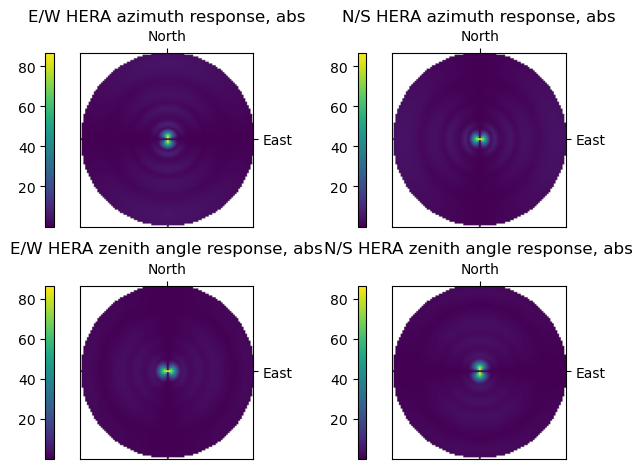

In [2]:
fig, ax = plt.subplots(2, 2)

be00 = ax[0,0].imshow(
    np.abs(hera_beam_vals[0,0,0]),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[0,0].set_title("E/W HERA azimuth response, abs")
_ = fig.colorbar(be00, ax=ax[0,0], location="left")

be10 = ax[1,0].imshow(
    np.abs(hera_beam_vals[1,0,0]),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[1,0].set_title("E/W HERA zenith angle response, abs")
_ = fig.colorbar(be00, ax=ax[1,0], location="left")

be01 = ax[0,1].imshow(
    np.abs(hera_beam_vals[0,1,0]),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[0,1].set_title("N/S HERA azimuth response, abs")
_ = fig.colorbar(be00, ax=ax[0,1], location="left")

be11 = ax[1,1].imshow(
    np.abs(hera_beam_vals[1,1,0]),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[1,1].set_title("N/S HERA zenith angle response, abs")
_ = fig.colorbar(be00, ax=ax[1,1], location="left")


for row_ind in range(2):
    for col_ind in range(2):
       _ = ax[row_ind,col_ind].set_xticks([0], labels=["North"])
       _ = ax[row_ind,col_ind].set_yticks([0], labels=["East"])
       _ = ax[row_ind,col_ind].yaxis.set_label_position("right")
       _ = ax[row_ind,col_ind].yaxis.tick_right()
       _ = ax[row_ind,col_ind].xaxis.set_label_position("top")
       _ = ax[row_ind,col_ind].xaxis.tick_top()

fig.tight_layout()

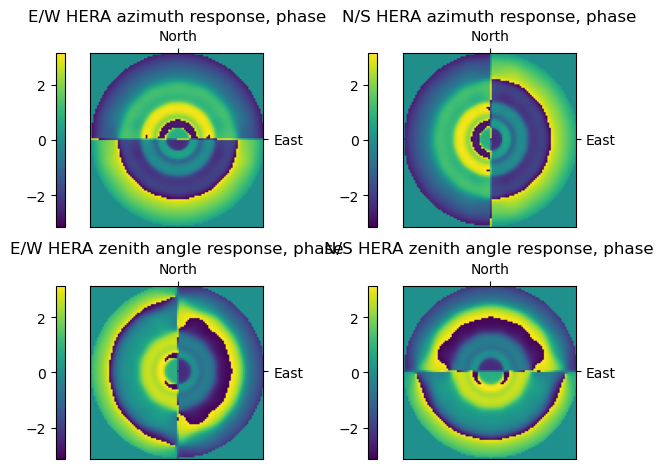

In [3]:
fig, ax = plt.subplots(2, 2)

be00 = ax[0,0].imshow(
    np.angle(hera_beam_vals[0,0,0]),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[0,0].set_title("E/W HERA azimuth response, phase")
_ = fig.colorbar(be00, ax=ax[0,0], location="left")

be10 = ax[1,0].imshow(
    np.angle(hera_beam_vals[1,0,0]),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[1,0].set_title("E/W HERA zenith angle response, phase")
_ = fig.colorbar(be00, ax=ax[1,0], location="left")

be01 = ax[0,1].imshow(
    np.angle(hera_beam_vals[0,1,0]),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[0,1].set_title("N/S HERA azimuth response, phase")
_ = fig.colorbar(be00, ax=ax[0,1], location="left")

be11 = ax[1,1].imshow(
    np.angle(hera_beam_vals[1,1,0]),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
    origin="lower",
)
_ = ax[1,1].set_title("N/S HERA zenith angle response, phase")
_ = fig.colorbar(be00, ax=ax[1,1], location="left")


for row_ind in range(2):
    for col_ind in range(2):
       _ = ax[row_ind,col_ind].set_xticks([0], labels=["North"])
       _ = ax[row_ind,col_ind].set_yticks([0], labels=["East"])
       _ = ax[row_ind,col_ind].yaxis.set_label_position("right")
       _ = ax[row_ind,col_ind].yaxis.tick_right()
       _ = ax[row_ind,col_ind].xaxis.set_label_position("top")
       _ = ax[row_ind,col_ind].xaxis.tick_top()

fig.tight_layout()


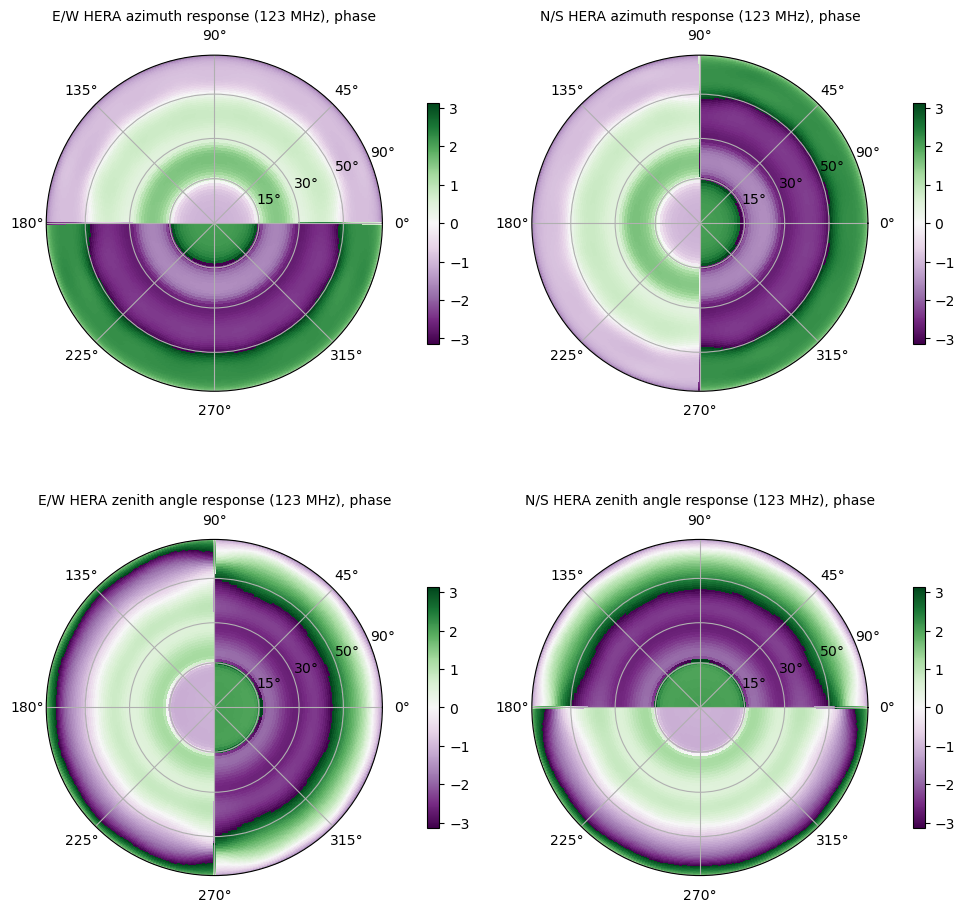

In [1]:
from pyuvdata import UVBeam
from pyuvdata.datasets import fetch_data

fetch_data(["hera_fagnoni_dipole_150", "hera_fagnoni_dipole_123"])
filename = fetch_data("hera_fagnoni_dipole_yaml")
hera_beam = UVBeam.from_file(filename, beam_type="efield")

hera_beam.plot(complex_type="phase")

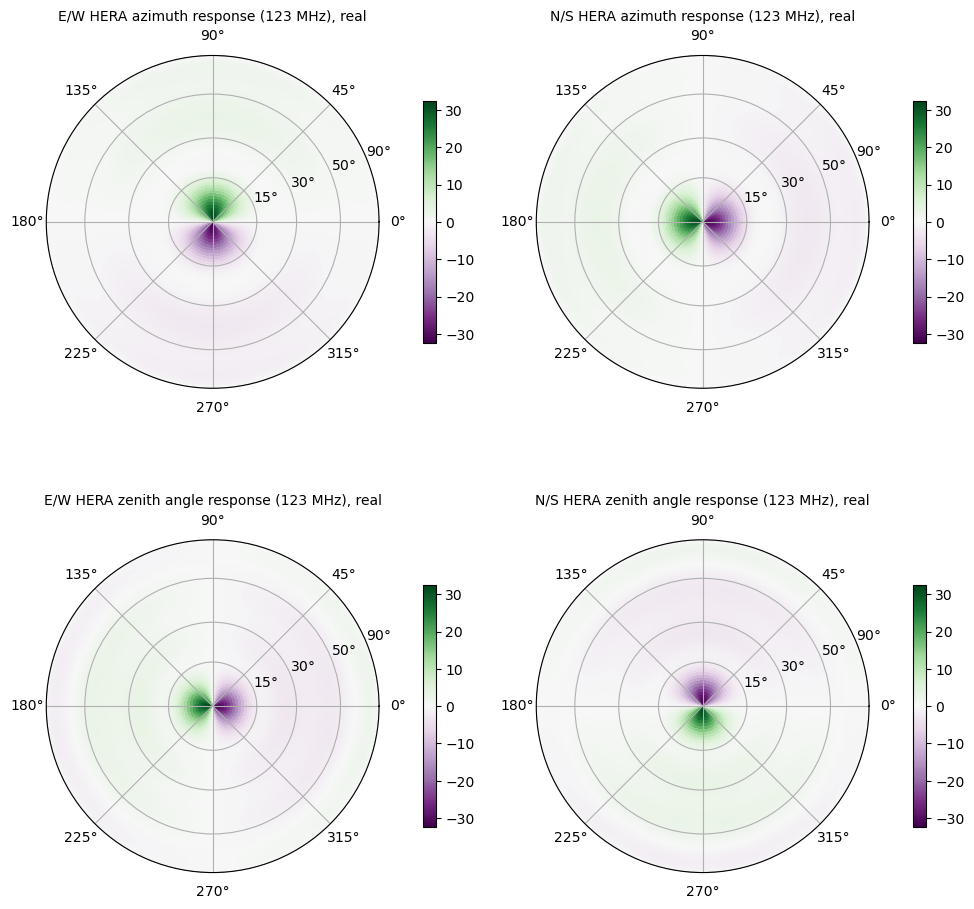

In [2]:
hera_beam.plot()

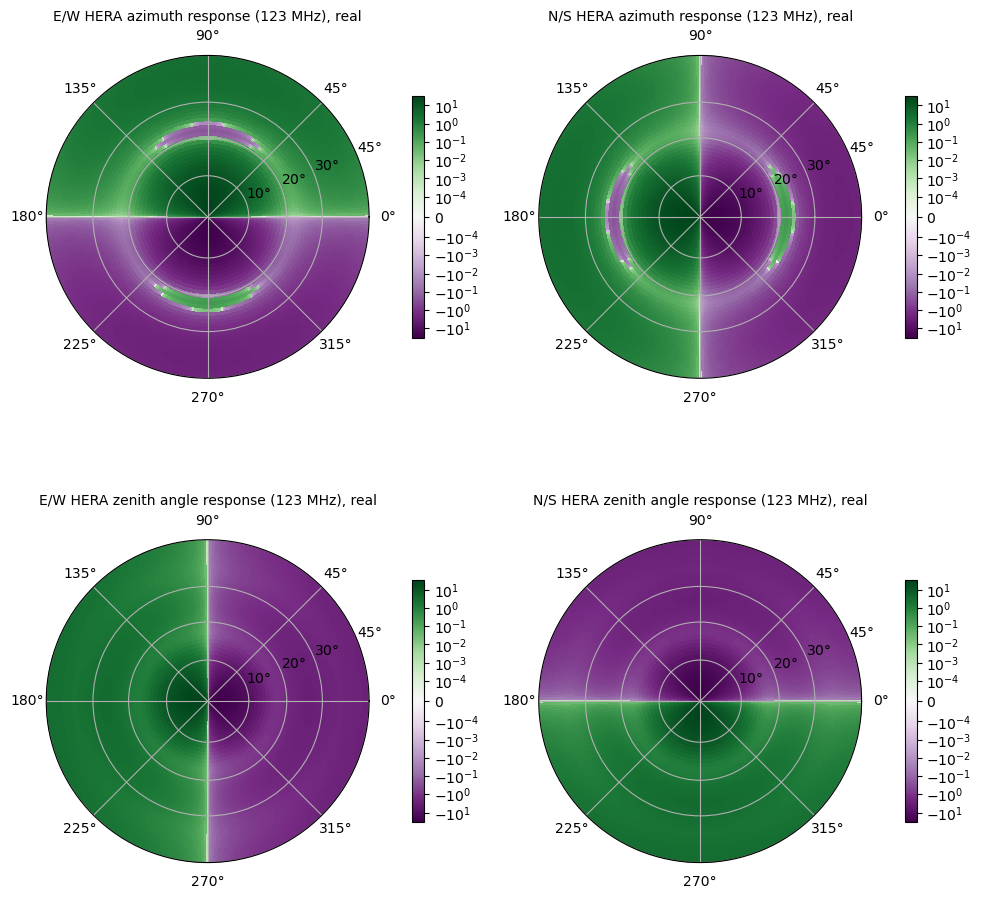

In [3]:
hera_beam.plot(max_zenith_deg=45., logcolor=True, norm_kwargs={"linthresh": 1e-4})